<a href="https://colab.research.google.com/github/MayaHayat/EconAlgo_Ex9_Q3/blob/main/EconAlgo_Ex9_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import cvxpy
import functools
import networkx as nx
import matplotlib.pyplot as plt


In [181]:
from networkx.algorithms.flow import edmonds_karp

In [180]:
print(nx.__version__)

3.2.1


In [223]:
def find_decomposition(budget: list[float], preferences: list[set[int]]):
    sum_budget = sum(budget)
    number_issues = len(budget)
    number_people = len(preferences)
    budget_per_person = sum_budget / number_people

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for citizens, topics, source, and destination
    G.add_node('s')  # source
    G.add_node('t')  # destination
    for i in range(number_people):
        G.add_node(f'citizen_{i}')

    # connect each citizen to matching issue
    for i, pref in enumerate(preferences):
        for issue in pref:
            G.add_edge(f'citizen_{i}', f'issue_{issue}', capacity=budget_per_person)

    # connect source to all citizens
    for i in range(number_people):
        G.add_edge('s', f'citizen_{i}', capacity=budget_per_person)

    for j in range(number_issues):
        G.add_edge(f'issue_{j}', 't', capacity=budget[j])

    # Calculate maximum flow
    flow_value, flow_dict = nx.maximum_flow(G, 's', 't')

    # Print capacities of each edge
    print("Capacities:")
    for u, v, attr in G.edges(data=True):
        print(f'Edge: {u} -> {v}, Capacity: {attr["capacity"]}')

    # Print flow values for each edge
    print("Flows:")
    for u in G.nodes:
        for v, flow in flow_dict[u].items():
            if flow > 0:
                print(f"Edge {u} -> {v}, Flow: {flow}")

    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black')
    plt.show()

    print("Is decomposition?")
    # Check if sum of flows out of each citizen equals budget_per_person
    for i in range(number_people):
      outflow_sum = sum(flow_dict[f'citizen_{i}'].values())
      if outflow_sum != budget_per_person:
        print(f"Sum of flows out of citizen_{i} does not equal {budget_per_person}")
        return False

    # Check if sum of incoming flows each issue equals its budget
    for j in range(number_issues):
        inflow_sum = sum(flow_dict[f'issue_{j}'].values())
        if inflow_sum != budget[j]:
            print(f"Sum of incoming flows into issue_{j} does not equal {budget[j]}")
            return False


    # Third condition is valid since since we don't connect edges between citizen and issues they're not interested in

    return True




Capacities:
Edge: s -> citizen_0, Capacity: 100.0
Edge: s -> citizen_1, Capacity: 100.0
Edge: s -> citizen_2, Capacity: 100.0
Edge: s -> citizen_3, Capacity: 100.0
Edge: s -> citizen_4, Capacity: 100.0
Edge: citizen_0 -> issue_0, Capacity: 100.0
Edge: citizen_0 -> issue_1, Capacity: 100.0
Edge: citizen_1 -> issue_0, Capacity: 100.0
Edge: citizen_1 -> issue_2, Capacity: 100.0
Edge: citizen_2 -> issue_0, Capacity: 100.0
Edge: citizen_2 -> issue_3, Capacity: 100.0
Edge: citizen_3 -> issue_1, Capacity: 100.0
Edge: citizen_3 -> issue_2, Capacity: 100.0
Edge: citizen_4 -> issue_0, Capacity: 100.0
Edge: issue_0 -> t, Capacity: 400
Edge: issue_1 -> t, Capacity: 50
Edge: issue_2 -> t, Capacity: 50
Edge: issue_3 -> t, Capacity: 0
Flows:
Edge s -> citizen_0, Flow: 100.0
Edge s -> citizen_1, Flow: 100.0
Edge s -> citizen_2, Flow: 100.0
Edge s -> citizen_3, Flow: 100.0
Edge s -> citizen_4, Flow: 100.0
Edge citizen_0 -> issue_0, Flow: 100.0
Edge citizen_1 -> issue_0, Flow: 100.0
Edge citizen_2 -> is

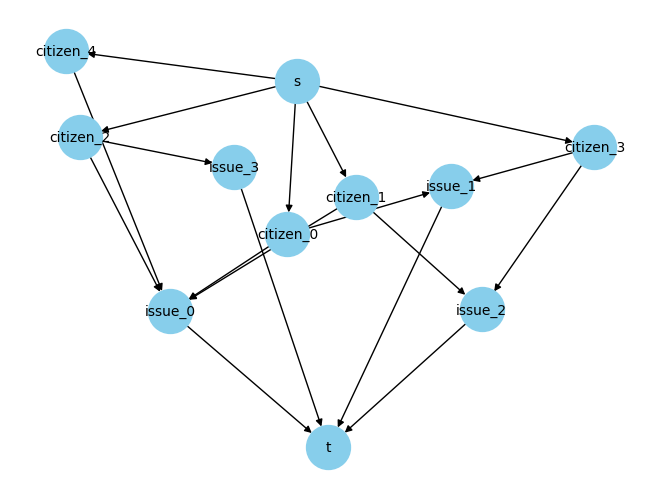

Is decomposition?


True

In [224]:
build_flow_network([400, 50, 50, 0],[{0,1}, {0,2}, {0,3}, {1,2}, {0}])

Capacities:
Edge: s -> citizen_0, Capacity: 100.0
Edge: s -> citizen_1, Capacity: 100.0
Edge: s -> citizen_2, Capacity: 100.0
Edge: citizen_0 -> issue_0, Capacity: 100.0
Edge: citizen_1 -> issue_1, Capacity: 100.0
Edge: citizen_2 -> issue_1, Capacity: 100.0
Edge: issue_0 -> t, Capacity: 0
Edge: issue_1 -> t, Capacity: 300
Flows:
Edge s -> citizen_1, Flow: 100.0
Edge s -> citizen_2, Flow: 100.0
Edge citizen_1 -> issue_1, Flow: 100.0
Edge citizen_2 -> issue_1, Flow: 100.0
Edge issue_1 -> t, Flow: 200.0


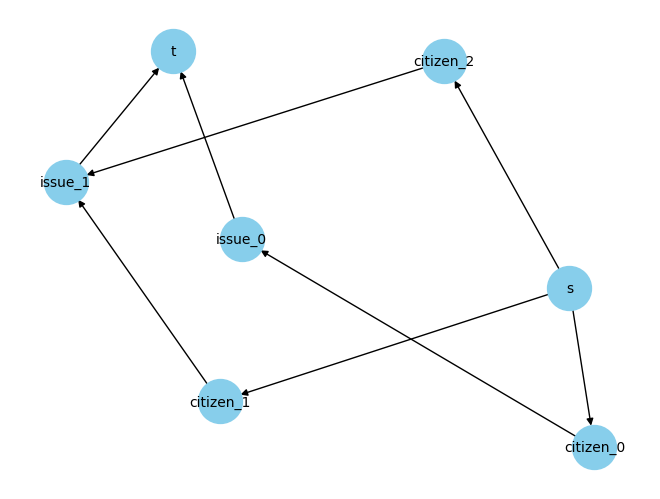

Is decomposition?
Sum of flows out of citizen_0 does not equal 100.0


False

In [225]:
build_flow_network([0, 300],[{0}, {1}, {1}])

Capacities:
Edge: s -> citizen_0, Capacity: 100.0
Edge: s -> citizen_1, Capacity: 100.0
Edge: s -> citizen_2, Capacity: 100.0
Edge: s -> citizen_3, Capacity: 100.0
Edge: s -> citizen_4, Capacity: 100.0
Edge: citizen_0 -> issue_0, Capacity: 100.0
Edge: citizen_0 -> issue_1, Capacity: 100.0
Edge: citizen_1 -> issue_0, Capacity: 100.0
Edge: citizen_1 -> issue_2, Capacity: 100.0
Edge: citizen_2 -> issue_0, Capacity: 100.0
Edge: citizen_3 -> issue_1, Capacity: 100.0
Edge: citizen_3 -> issue_2, Capacity: 100.0
Edge: citizen_4 -> issue_0, Capacity: 100.0
Edge: issue_0 -> t, Capacity: 370
Edge: issue_1 -> t, Capacity: 65
Edge: issue_2 -> t, Capacity: 65
Edge: issue_3 -> t, Capacity: 0
Flows:
Edge s -> citizen_0, Flow: 100.0
Edge s -> citizen_1, Flow: 100.0
Edge s -> citizen_2, Flow: 100.0
Edge s -> citizen_3, Flow: 100.0
Edge s -> citizen_4, Flow: 100.0
Edge citizen_0 -> issue_0, Flow: 100.0
Edge citizen_1 -> issue_0, Flow: 70.0
Edge citizen_1 -> issue_2, Flow: 30.0
Edge citizen_2 -> issue_0, 

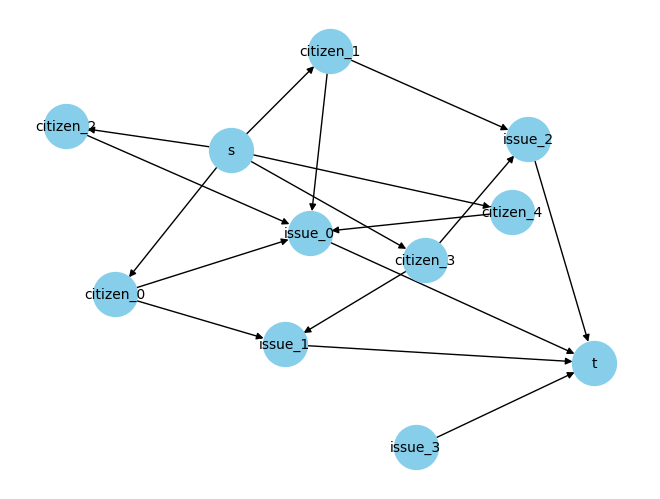

Is decomposition?


True

In [226]:
build_flow_network([370, 65, 65, 0],[{0,1}, {0,2}, {0}, {1,2}, {0}])